1.

Optimal Theta (Intercept, Linear): [-106.16971083  300.61978935]
Minimum Cost (MSE): 172822.60341233603
Iterations: 1000
Learning Rate: 0.01
Equation of the linear regression model: y = -106.1697 + 300.6198x


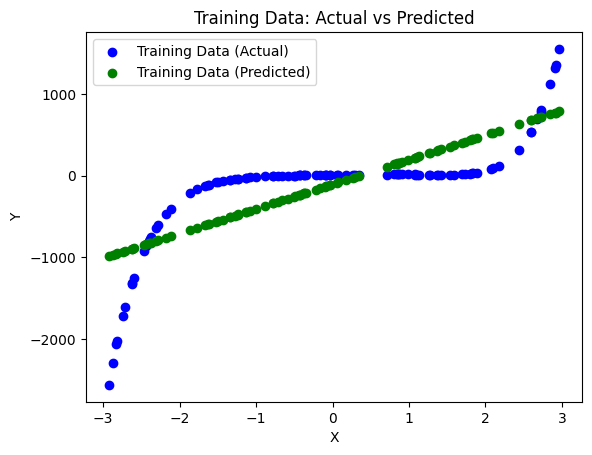

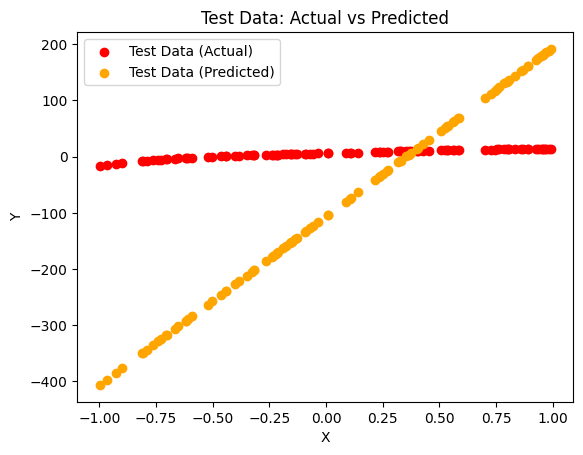

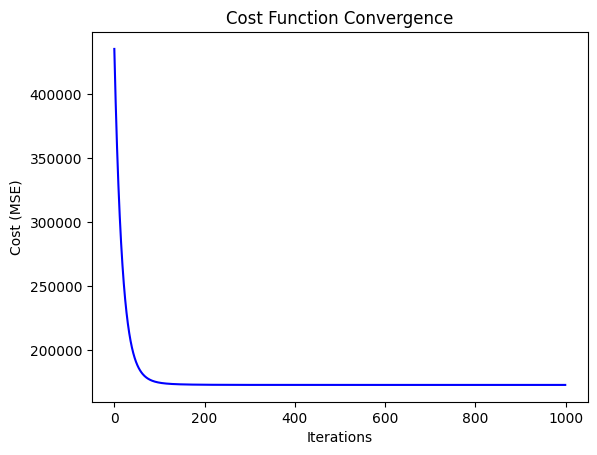

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Load data
x_train = np.load('/content/x_train.npy')
y_train = np.load('/content/y_train.npy')
x_test = np.load('/content/x_test.npy')
y_test = np.load('/content/y_test.npy')
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
X_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
theta = np.random.randn(2, 1)

def predict(X, theta):
    return X.dot(theta)

def compute_cost(X, y, theta):
    m = len(y)
    cost = (1 / m) * np.sum(np.square(predict(X, theta) - y))  # MSE
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    min_cost = float('inf')

    for i in range(iterations):
        gradients = (1/m) * X.T.dot(predict(X, theta) - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if cost < min_cost:
            min_cost = cost

    return theta, min_cost, cost_history
##################################################################

theta_optimal, min_cost, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

print(f"Optimal Theta (Intercept, Linear): {theta_optimal.ravel()}")
print(f"Minimum Cost (MSE): {min_cost}")
print(f"Iterations: {iterations}")
print(f"Learning Rate: {learning_rate}")


intercept, linear_coef = theta_optimal.ravel()
print(f"Equation of the linear regression model: y = {intercept:.4f} + {linear_coef:.4f}x")

y_train_pred = predict(X_train, theta_optimal)
y_test_pred = predict(X_test, theta_optimal)


plt.figure()
plt.scatter(x_train, y_train, color='blue', label='Training Data (Actual)')
plt.scatter(x_train, y_train_pred, color='green', label='Training Data (Predicted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()


plt.figure()
plt.scatter(x_test, y_test, color='red', label='Test Data (Actual)')
plt.scatter(x_test, y_test_pred, color='orange', label='Test Data (Predicted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()



a.  The plotted relationship appears to be cubic in nature.

b.  The linear model fails to model the relationship accuratly. The minimum cost function achieved was 86,411, in the context of our data, this is not good. The relationship appears cubic so I will apply a basis function to model the cubic relationship. Experimenting with iterations and learning rate did not improve results.

The linear model equation:
y = -106.17 + 300.62x

Optimal Theta (Intercept, Linear, Cubic): [-112.05436994 -179.33451692   86.52589222]
Minimum Cost (MSE): 40290.65066741051
Iterations: 1000
Learning Rate: 0.01
Equation of the cubic regression model: y = -112.0544 + -179.3345x + 86.5259x^3


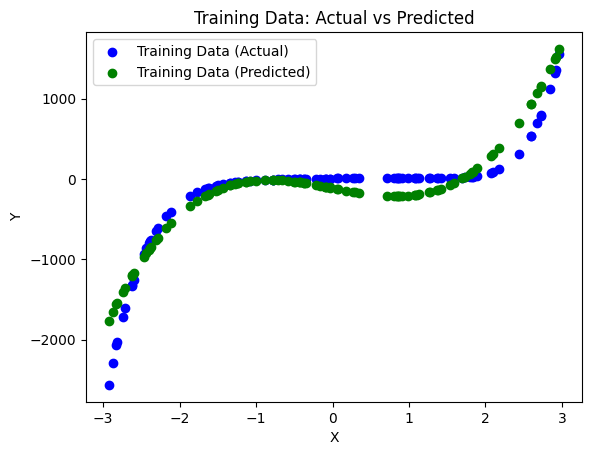

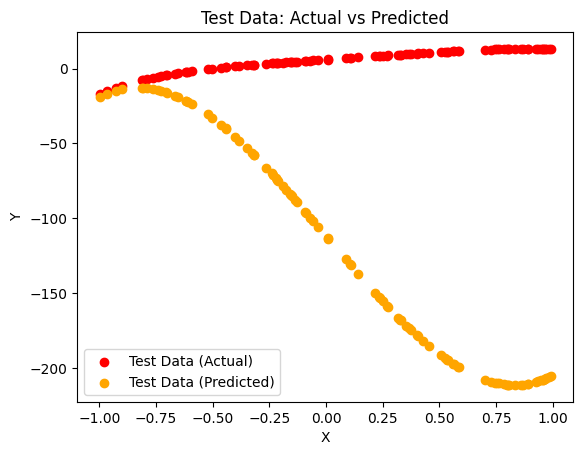

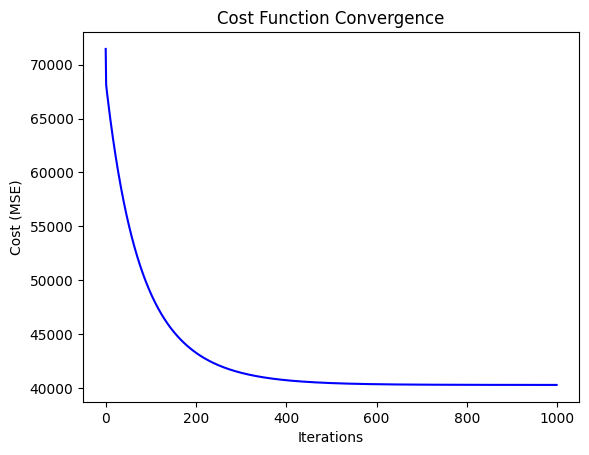

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Load data
x_train = np.load('/content/x_train.npy')
y_train = np.load('/content/y_train.npy')
x_test = np.load('/content/x_test.npy')
y_test = np.load('/content/y_test.npy')

# Reshape the data
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_train = np.c_[np.ones((x_train.shape[0], 1)), x_train, np.power(x_train, 3)]
X_test = np.c_[np.ones((x_test.shape[0], 1)), x_test, np.power(x_test, 3)]
theta = np.random.randn(3, 1)

def predict(X, theta):
    return X.dot(theta)

def compute_cost(X, y, theta): #MSE
    m = len(y)
    cost = (1 / m) * np.sum(np.square(predict(X, theta) - y))  # MSE directly
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []  # Store the cost at each iteration
    min_cost = float('inf')

    for i in range(iterations):
        gradients = (1/m) * X.T.dot(predict(X, theta) - y)
        theta = theta - learning_rate * gradients

        # Compute cost for the current theta
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if cost < min_cost:
            min_cost = cost

    return theta, min_cost, cost_history
#######################################################
theta_optimal, min_cost, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

print(f"Optimal Theta (Intercept, Linear, Cubic): {theta_optimal.ravel()}")
print(f"Minimum Cost (MSE): {min_cost}")
print(f"Iterations: {iterations}")
print(f"Learning Rate: {learning_rate}")


intercept, linear_coef, cubic_coef = theta_optimal.ravel()
print(f"Equation of the cubic regression model: y = {intercept:.4f} + {linear_coef:.4f}x + {cubic_coef:.4f}x^3")

y_train_pred = predict(X_train, theta_optimal)
y_test_pred = predict(X_test, theta_optimal)


plt.figure()
plt.scatter(x_train, y_train, color='blue', label='Training Data (Actual)')
plt.scatter(x_train, y_train_pred, color='green', label='Training Data (Predicted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.figure()
plt.scatter(x_test, y_test, color='red', label='Test Data (Actual)')
plt.scatter(x_test, y_test_pred, color='orange', label='Test Data (Predicted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()




2.


Iteration 0: Mean Squared Error (MSE) on Test Data: 44678569597.66231


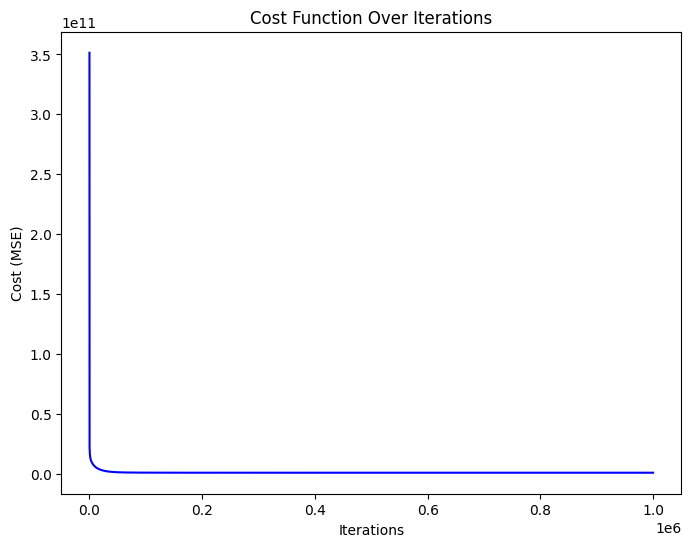

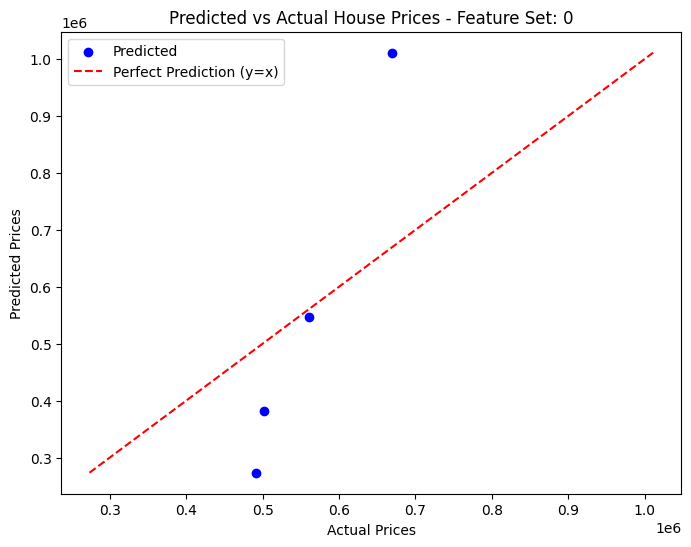

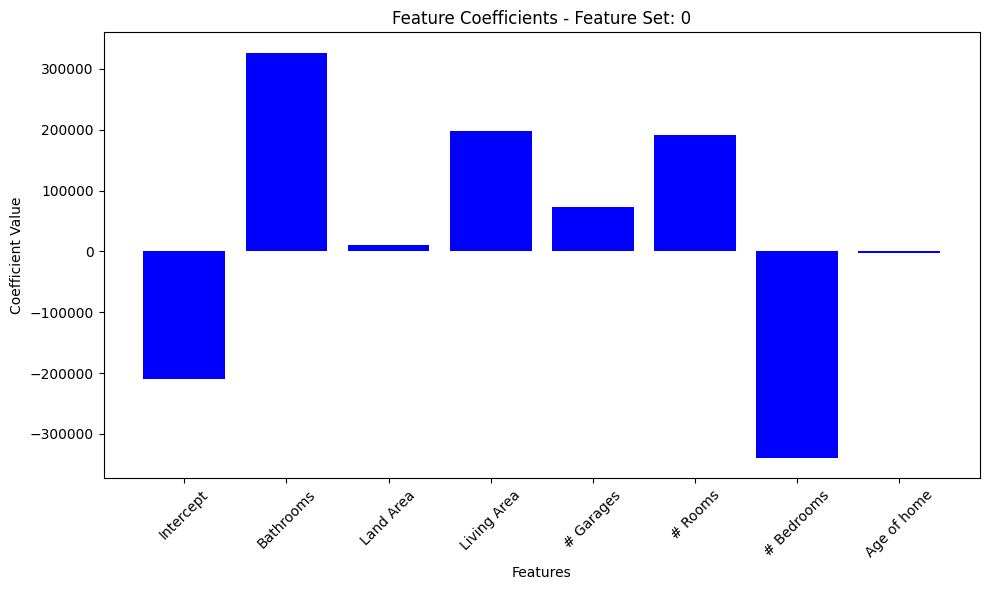

Removed feature: Age of home
Iteration 1: Mean Squared Error (MSE) on Test Data: 43294940899.24124


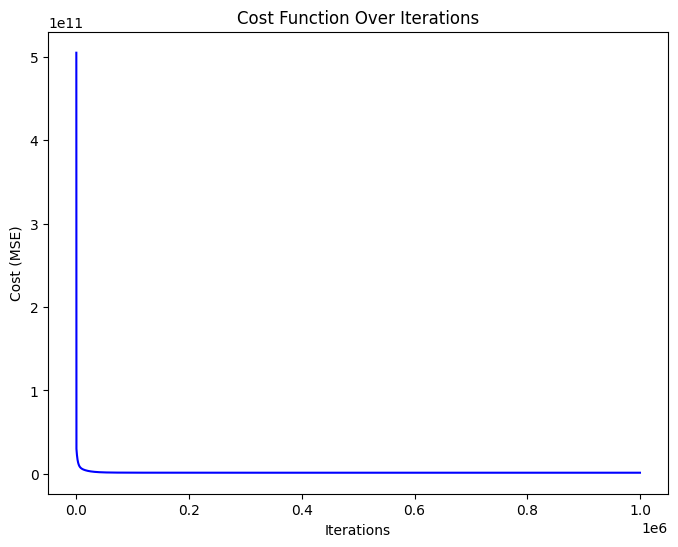

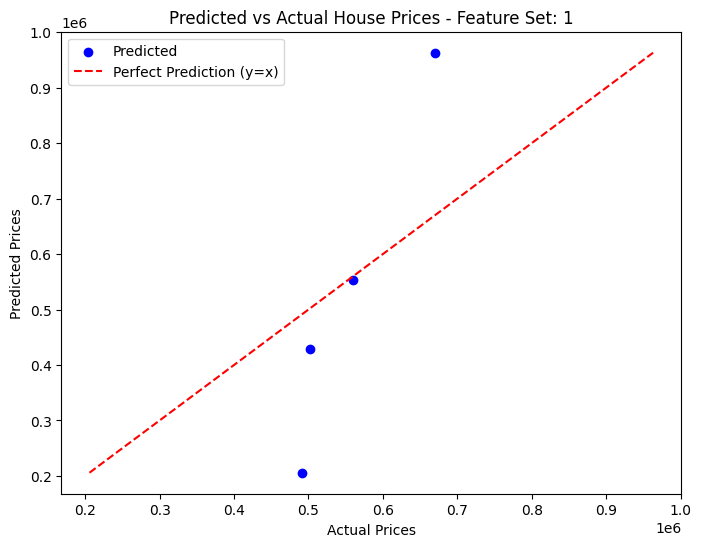

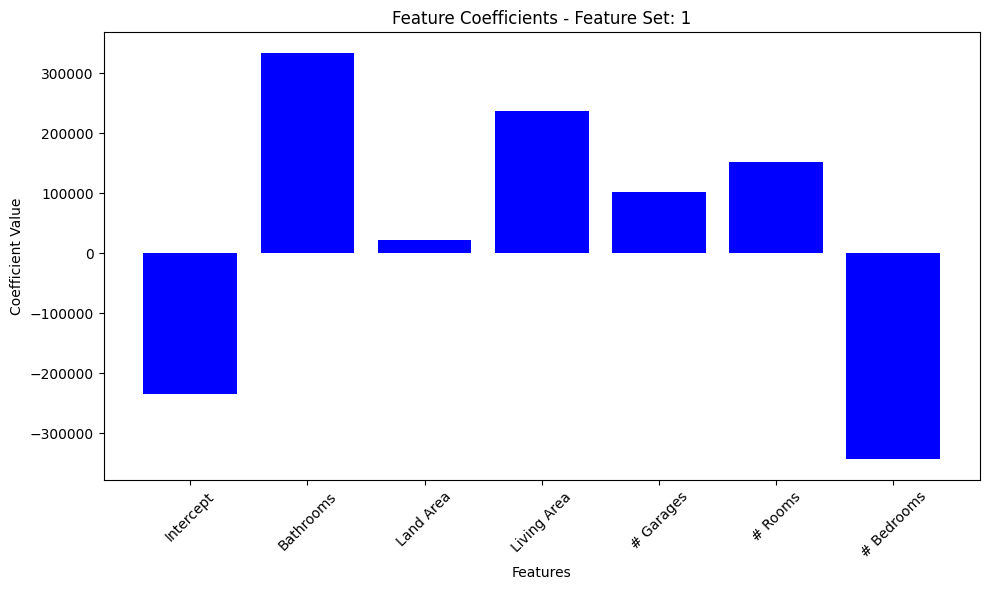

Removed feature: Land Area
Iteration 2: Mean Squared Error (MSE) on Test Data: 41036322121.238945


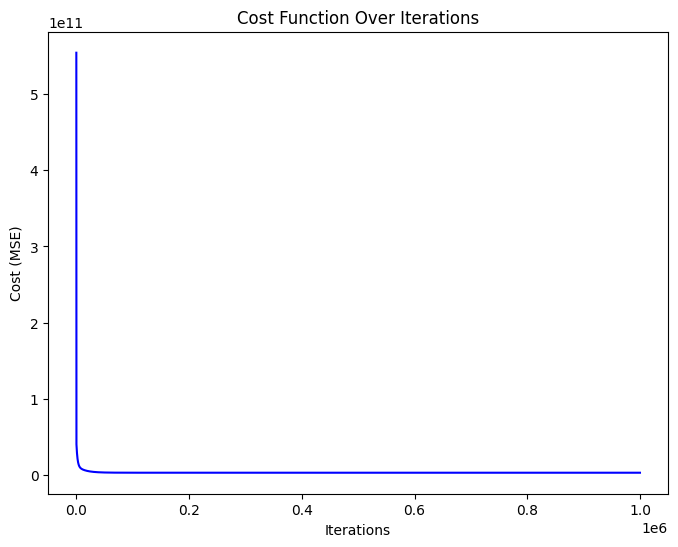

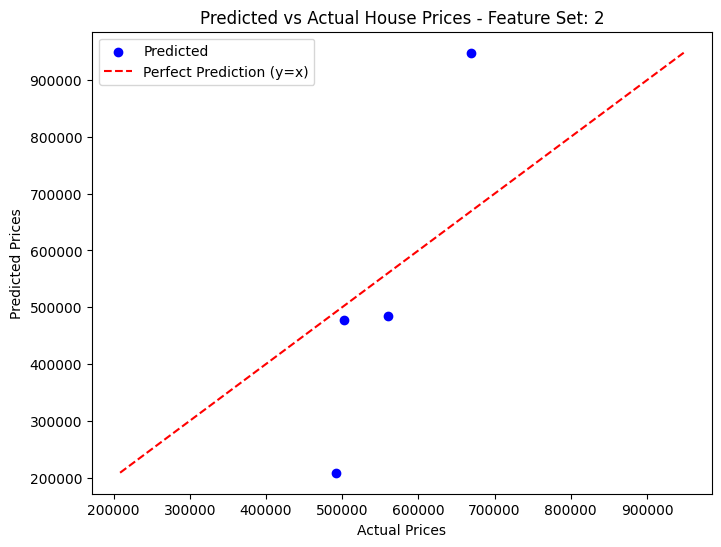

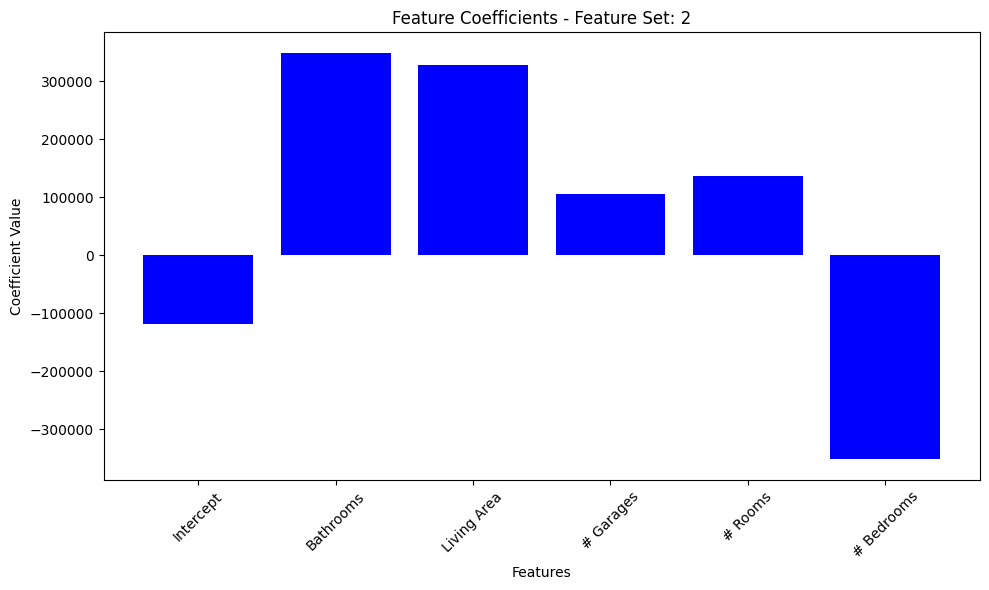

Removed feature: # Garages
Iteration 3: Mean Squared Error (MSE) on Test Data: 24126086597.626034


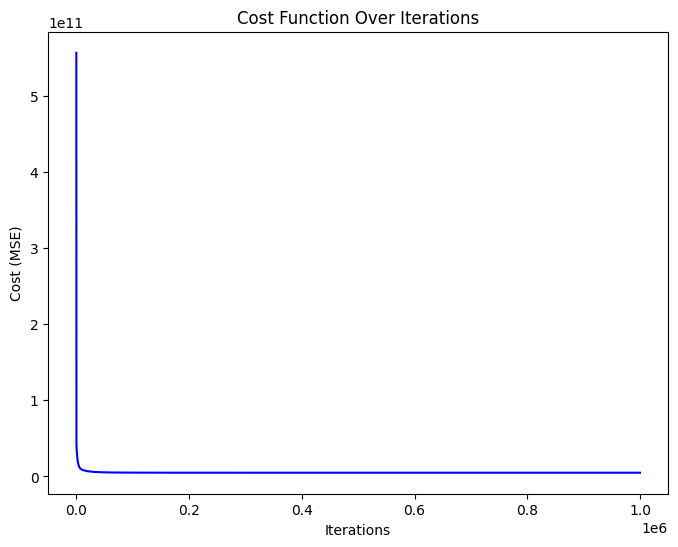

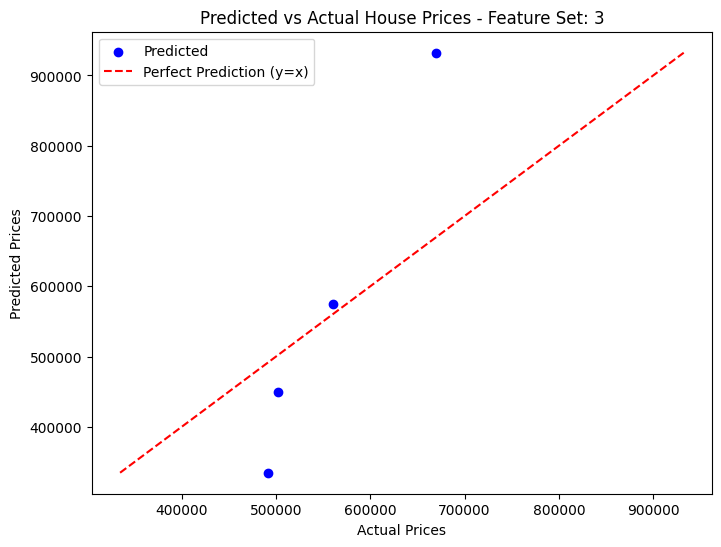

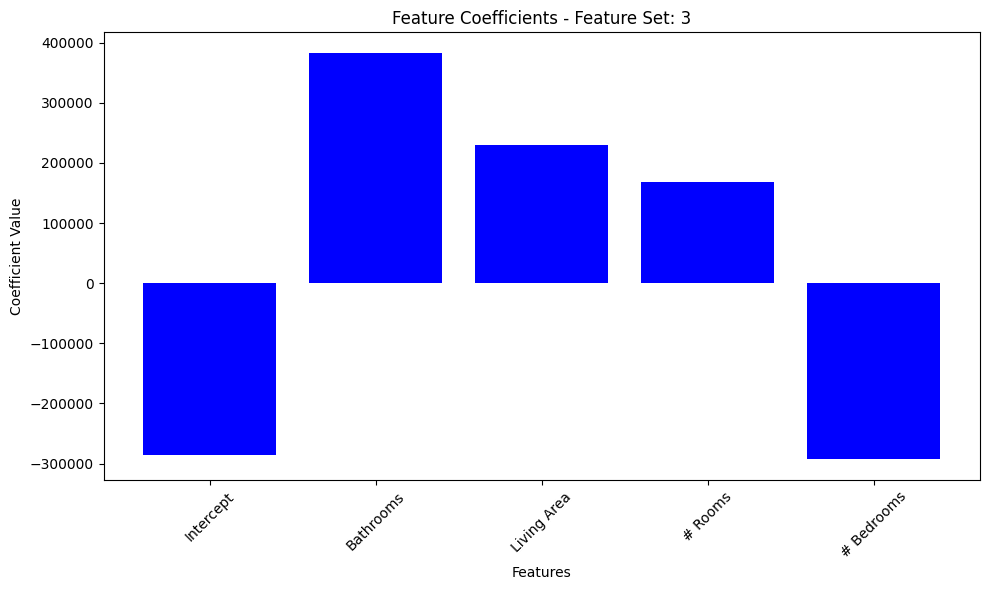

Removed feature: # Rooms
Iteration 4: Mean Squared Error (MSE) on Test Data: 10724781923.356218


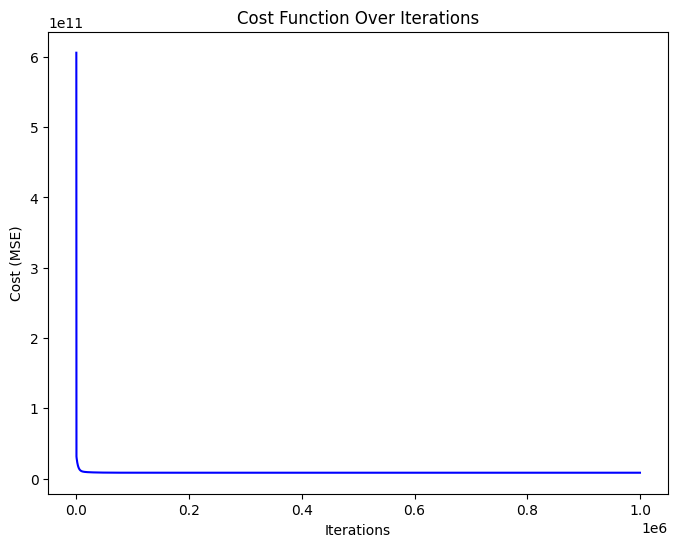

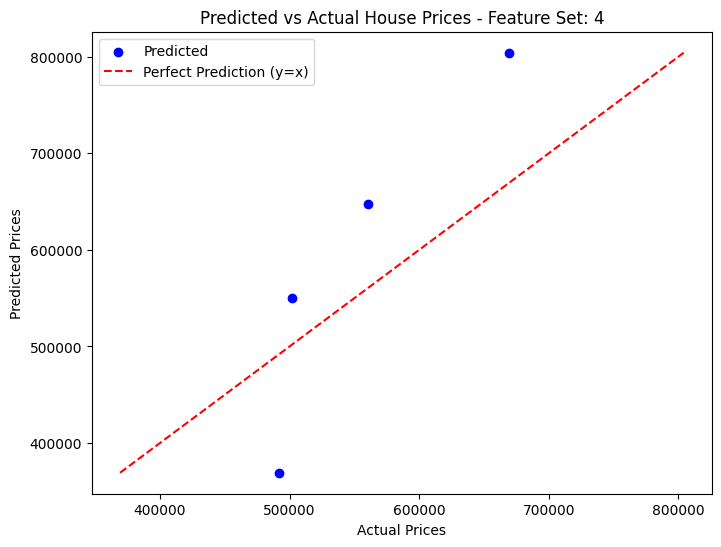

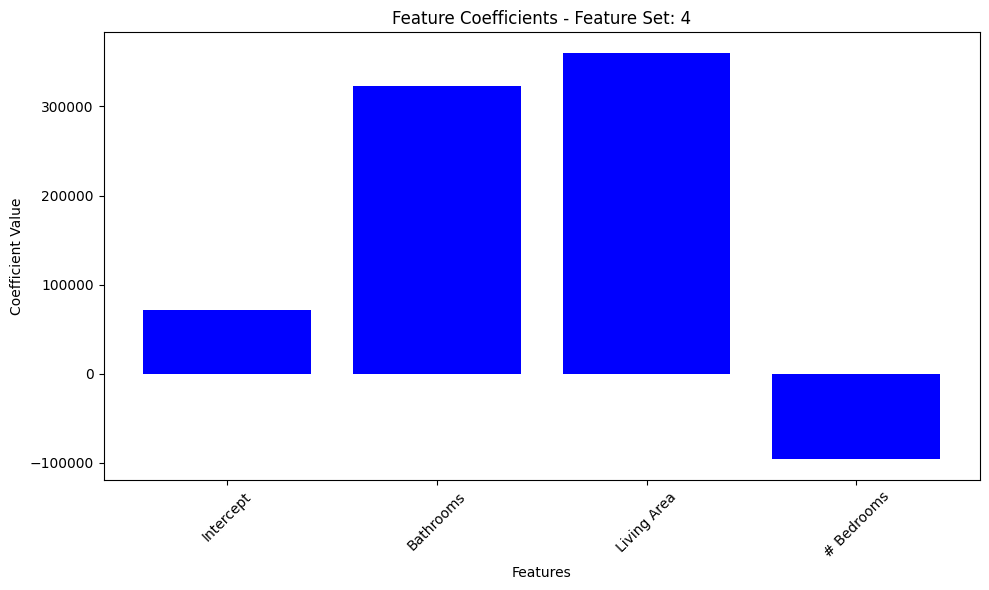

Removed feature: # Bedrooms
Iteration 5: Mean Squared Error (MSE) on Test Data: 9187123239.93547


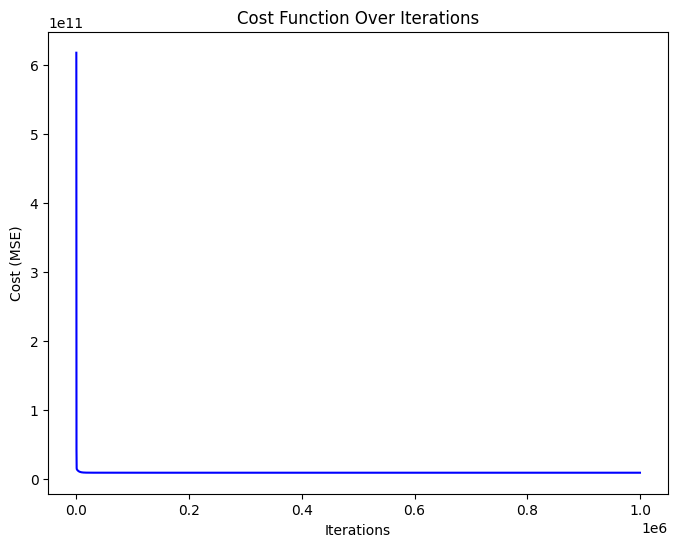

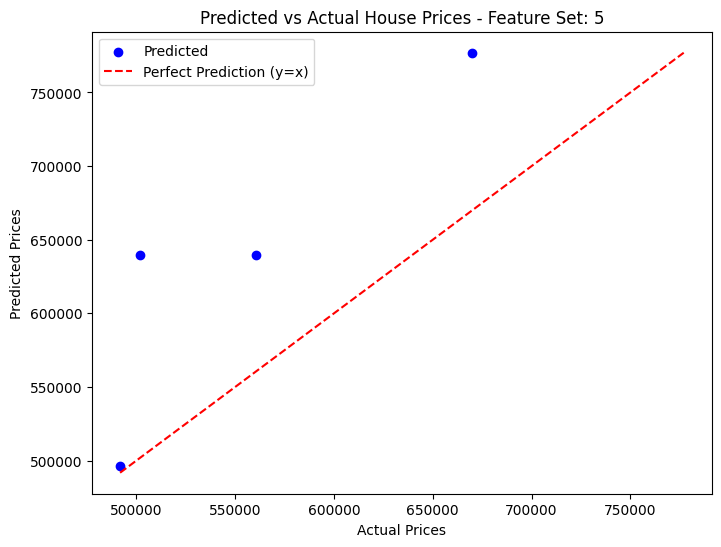

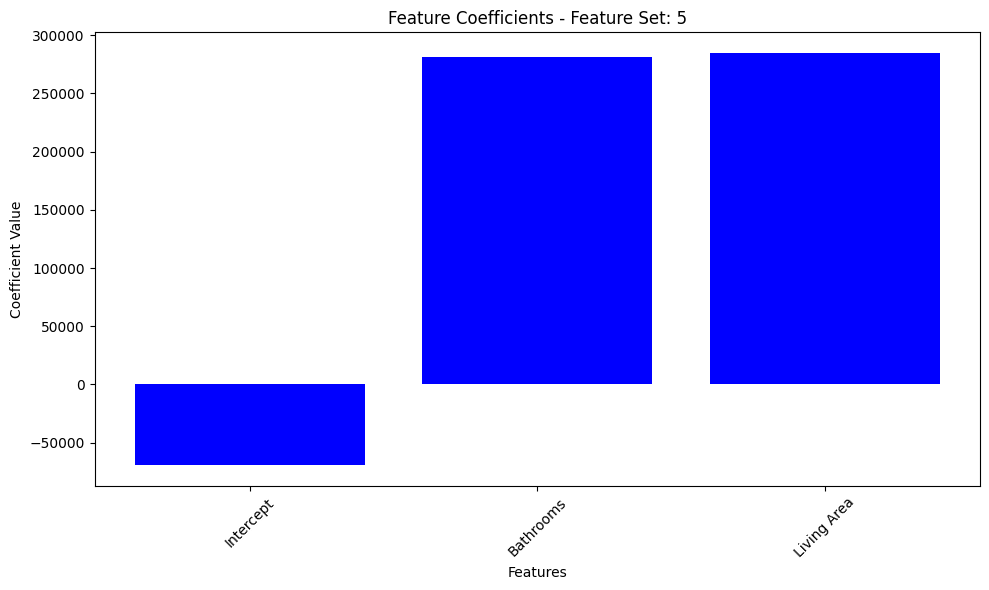

Removed feature: Bathrooms
Iteration 6: Mean Squared Error (MSE) on Test Data: 16622032888.790855


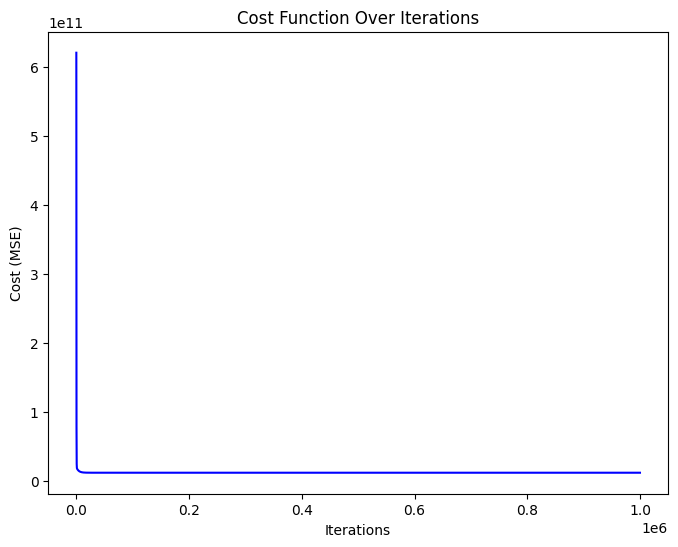

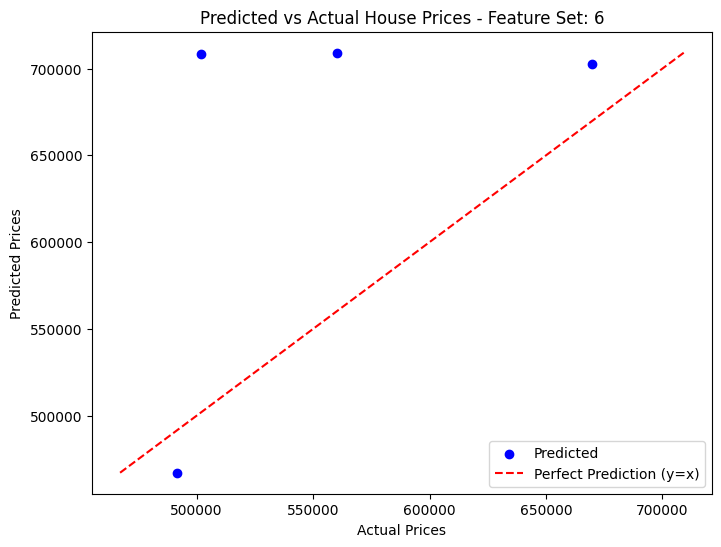

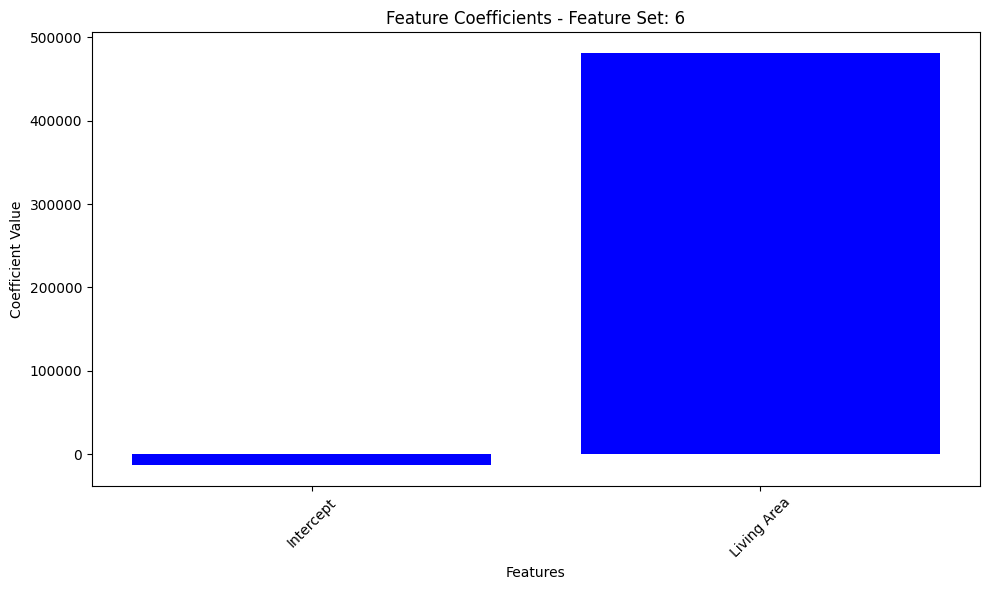

Model stopped improving. Final set of features: ['Intercept' 'Living Area']
Final Model Coefficients:
        Feature    Coefficient
0    Intercept  -69364.675508
1    Bathrooms  281723.804557
2  Living Area  284795.467318
Removed features: ['Age of home', 'Land Area', '# Garages', '# Rooms', '# Bedrooms', 'Bathrooms']
Final Mean Squared Error (MSE): 9187123239.93547


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

learning_rate = 0.001
iterations = 1000000
test_size_val = .20

data = pd.read_excel('/content/Housing_data_regression.xlsx')
data = data.drop(columns=['House ID'])
X = data.drop(columns=['Price']).values
y = data['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_val, random_state=42)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
theta = np.random.randn(X_train.shape[1], 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
#############################################################################
def predict(X, theta):
    return X.dot(theta)

def compute_cost(X, y, theta):
    m = len(y)
    cost = (1 / m) * np.sum(np.square(predict(X, theta) - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        gradients = (1/m) * X.T.dot(predict(X, theta) - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

def plot_cost_function(cost_history):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Cost Function Over Iterations')
    plt.show()

def remove_least_impactful_feature(X, theta_optimal):
    least_impactful_index = np.argmin(np.abs(theta_optimal[1:])) + 1
    X_reduced = np.delete(X, least_impactful_index, axis=1)
    return X_reduced, least_impactful_index

def plot_predicted_vs_actual(y_test, y_test_pred, feature_set):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, color='blue', label='Predicted')
    min_value = min(min(y_test), min(y_test_pred))
    max_value = max(max(y_test), max(y_test_pred))
    plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction (y=x)')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Predicted vs Actual House Prices - Feature Set: {feature_set}')
    plt.legend()
    plt.show()

def plot_coefficients(coefficients, feature_names, feature_set):
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, coefficients, color='blue')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title(f'Feature Coefficients - Feature Set: {feature_set}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def run_and_remove_features(X_train, X_test, y_train, y_test, feature_names, learning_rate, iterations):
    num_features = X_train.shape[1]
    previous_mse = float('inf')
    current_mse = float('inf')
    removed_features = []
    iteration = 0
    while num_features > 1:
        theta = np.random.randn(X_train.shape[1], 1)
        theta_optimal, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)
        current_mse = compute_cost(X_test, y_test, theta_optimal)
        print(f"Iteration {iteration}: Mean Squared Error (MSE) on Test Data: {current_mse}")
        plot_cost_function(cost_history)
        y_test_pred = predict(X_test, theta_optimal)
        plot_predicted_vs_actual(y_test, y_test_pred, iteration)
        plot_coefficients(theta_optimal.flatten(), feature_names, iteration)
        if current_mse >= previous_mse:
            print(f"Model stopped improving. Final set of features: {feature_names}")
            break
        previous_mse = current_mse
        best_theta = theta_optimal
        best_feature_names = feature_names[:]
        X_train, least_impactful_index_train = remove_least_impactful_feature(X_train, theta_optimal)
        X_test = np.delete(X_test, least_impactful_index_train, axis=1)
        removed_feature = feature_names[least_impactful_index_train]
        removed_features.append(removed_feature)
        feature_names = np.delete(feature_names, least_impactful_index_train)
        num_features = X_train.shape[1]
        print(f"Removed feature: {removed_feature}")
        iteration += 1
    return best_theta, best_feature_names, previous_mse, removed_features
###########################################################################
feature_names = np.array(['Intercept', 'Bathrooms', 'Land Area', 'Living Area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home'])
best_theta, best_feature_names, final_mse, removed_features = run_and_remove_features(X_train, X_test, y_train, y_test, feature_names, learning_rate, iterations)
coefficients_df = pd.DataFrame({
    'Feature': best_feature_names,
    'Coefficient': best_theta.flatten()
})
print("Final Model Coefficients:\n", coefficients_df)
print(f"Removed features: {removed_features}")
print(f"Final Mean Squared Error (MSE): {final_mse}")


1. What is the average least squares error for the given data using your simple linear regression
model?

Intial: 44,678,569,597.86524 MSE = +- 211,373.05788077 Dollars

Reduced: 9,187,123,239.935658 MSE = +- 95,849.482210055 Dollars

The small dataset limited the models ability to learn. The intial MSE was very high but after removing the least impactful variables, the Reduced variable MSE proved much better.


---



2. Which feature has the greatest impact on the predicted house prices? How can you justify this finding? Could this feature alone serve as a predictor for house prices?

Initially, the number of bedrooms was the most impactful variable. I automated the code to remove the least effective variables until the MSE increased, which led to a minimum MSE with the variables: intercept, bathroom, and living area.

This result was not intuitive. Despite being the most impactful initially, the number of bedrooms was removed in iteration 4.

Ultimately, the model identified bathroom and living area as the most impactful variables.


---


3. Which feature has the least impact on the predicted house prices? How can you verify this? What is the impact on model performance when this feature is removed from the dataset?

Initially, the age of home was the least impactful variable. Removing this variable increased the accuracy of the model, providing further evidence that the age of home was acting as noise.

The results were not always intuitive and sometimes defied expectations. For example, the number of bedrooms negatively affected the model. This may have been due to the redundancy of data, as the number of rooms included both bathrooms and bedrooms. The large negative value of bedrooms might have been counteracting this redundancy.

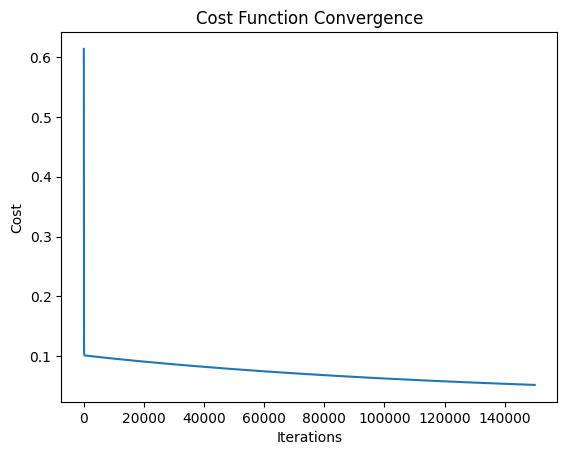


Model Information:
Learning Rate: 0.01
Iterations: 150000
Decision Boundary: 0.85
Minimum Cost (MSE): 0.051821
Test Set Accuracy: 93.33%



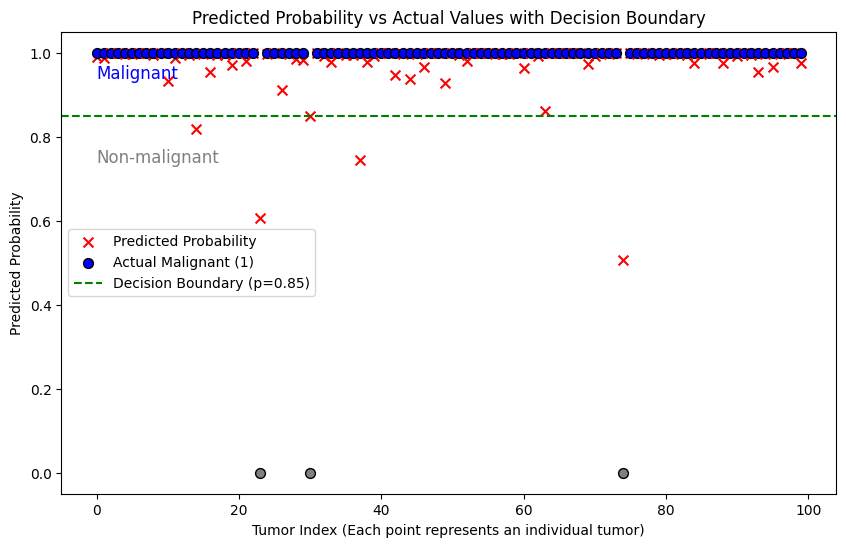

Confusion Matrix:
[[95  0]
 [ 2  3]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv('/content/Question3_Tumor_train_data.csv')
test_data = pd.read_csv('/content/Question3_Tumor_test_data.csv')
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# bias
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

#################################################################################################################

# Set hyperparameters
learning_rate = 0.01
iterations = 150000
dec_bound = 0.85

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_logistic(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-10  # A small value to avoid log(0)
    h = np.clip(h, epsilon, 1 - epsilon)

    cost = -(1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

def gradient_descent_logistic(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradients = (1/m) * X.T.dot(h - y)
        theta -= learning_rate * gradients
        cost = compute_cost_logistic(X, y, theta)
        cost_history.append(cost.flatten()[0])  # to scalar

    return theta, cost_history

theta = np.random.randn(X_train.shape[1], 1)
theta_optimal, cost_history = gradient_descent_logistic(X_train, y_train, theta, learning_rate, iterations)
y_train_pred_prob = sigmoid(X_train.dot(theta_optimal))

plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

def predict_logistic(X, theta):
    return sigmoid(X.dot(theta)) >= dec_bound

y_test_pred = predict_logistic(X_test, theta_optimal)
accuracy = np.mean(y_test_pred == y_test) * 100

print("\nModel Information:")
print(f"Learning Rate: {learning_rate}")
print(f"Iterations: {iterations}")
print(f"Decision Boundary: {dec_bound}")
print(f"Minimum Cost (MSE): {cost_history[-1]:.6f}")
print(f"Test Set Accuracy: {accuracy:.2f}%\n")

def plot_and_compute_confusion_matrix(X, y_true, y_pred_prob, dec_bound=0.5):
    plt.figure(figsize=(10, 6))
    TP = TN = FP = FN = 0
    tumor_index = np.arange(len(y_true))
    for i in range(len(y_true)):
        predicted_label = 1 if y_pred_prob[i] >= dec_bound else 0

        # Plot predicted probabilities as 'x' markers
        plt.scatter(tumor_index[i], y_pred_prob[i], color='red', marker='x', s=50, label='Predicted Probability' if i == 0 else "")

        # Plot actual values (malignant or non-malignant) as circles
        if y_true[i] == 1:
            plt.scatter(tumor_index[i], y_true[i], color='blue', s=50, edgecolors='k', label='Actual Malignant (1)' if i == 0 else "")
        else:
            plt.scatter(tumor_index[i], y_true[i], color='gray', s=50, edgecolors='k', label='Actual Non-malignant (0)' if i == 0 else "")

        if y_true[i] == 1:  # Actual malignant (1)
            if predicted_label == 1:
                TP += 1  # True Positive
            else:
                FN += 1  # False Negative
        else:  # Actual non-malignant (0)
            if predicted_label == 0:
                TN += 1  # True Negative
            else:
                FP += 1  # False Positive

    plt.axhline(y=dec_bound, color='green', linestyle='--', label=f'Decision Boundary (p={dec_bound})')
    plt.text(0, dec_bound - 0.1, 'Non-malignant', color='gray', fontsize=12, verticalalignment='center')
    plt.text(0, dec_bound + 0.1, 'Malignant', color='blue', fontsize=12, verticalalignment='center')
    plt.xlabel('Tumor Index (Each point represents an individual tumor)')
    plt.ylabel('Predicted Probability')
    plt.title('Predicted Probability vs Actual Values with Decision Boundary')
    plt.legend()
    plt.show()
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    return confusion_matrix

y_train_pred_prob = sigmoid(X_train.dot(theta_optimal))
confusion_matrix = plot_and_compute_confusion_matrix(X_train, y_train, y_train_pred_prob, dec_bound)
print("Confusion Matrix:")
print(confusion_matrix)




The Linear Regression Cost Function is mean squared error, while Logistic Regression utilizes log-likelihood. The differences are due to the entirely different prediction methods. Linear Reg. predicts continous values. Logistic Reg. gives probabilities (not linear) that are then used to classify values.

In traditional logistic Regression, the goal is to maximize log-likelihood; however, minimizing the negative log likelihood is computationally more efficient. This method is implemented in my code.


---

1. Why is the sigmoid function critical in Logistic Regression? How does it influence the interpretation of the output?

The sigmoid function transforms the logistic regression output into a probability, 0 - 1. Without the sigmoid function, the outputs would be continuous and unusable.

2. What are the key differences between the logistic regression model and the linear regression model, particularly in the context of the cost function and the type of problem each is used for?

Linear Regression is used to predict values (unique or indivudal values). Logistic Regression is used to predict classifications (this can be groups of values, a range, high low, etc.). Linear Regression was used to predict home prices. Logistic Regression could be used to classify the house as small or large.

3. How would you modify your logistic regression model to handle multi-class
classification problems?

Replace the Sigmoid function with a Softmax function. Modify the cost function to handle multiple classes. Theta will become a matrix, with each column representing the parameter vector of a class. This method determines the probability for each class individually; then the highest probability determines the class.